# Libraries

In [51]:
import pandas as pd
import numpy as np
import time
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import warnings

from warnings import filterwarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
filterwarnings("ignore")

# Options

In [52]:
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 350)
pd.set_option("display.float_format", lambda x: "%.3f" % x)
warnings.simplefilter(action="ignore")

# Dataset Reading and Exploration

## Reading the dataset

In [53]:
url = "https://cocl.us/concrete_data"

df = pd.read_csv(url)
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.000,0.000,0.000,162.000,2.500,1040.000,676.000,28,79.990
1,540.000,0.000,0.000,162.000,2.500,1055.000,676.000,28,61.890
2,332.500,142.500,0.000,228.000,0.000,932.000,594.000,270,40.270
3,332.500,142.500,0.000,228.000,0.000,932.000,594.000,365,41.050
4,198.600,132.400,0.000,192.000,0.000,978.400,825.500,360,44.300


# Adjusting Columns Names

In [54]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.000,0.000,0.000,162.000,2.500,1040.000,676.000,28,79.990
1,540.000,0.000,0.000,162.000,2.500,1055.000,676.000,28,61.890
2,332.500,142.500,0.000,228.000,0.000,932.000,594.000,270,40.270
3,332.500,142.500,0.000,228.000,0.000,932.000,594.000,365,41.050
4,198.600,132.400,0.000,192.000,0.000,978.400,825.500,360,44.300


# Checking The Dataset

In [55]:
df.dtypes

cement                float64
blast_furnace_slag    float64
fly_ash               float64
water                 float64
superplasticizer      float64
coarse_aggregate      float64
fine_aggregate        float64
age                     int64
strength              float64
dtype: object

In [56]:
df.isnull().sum()

cement                0
blast_furnace_slag    0
fly_ash               0
water                 0
superplasticizer      0
coarse_aggregate      0
fine_aggregate        0
age                   0
strength              0
dtype: int64

All variables are numeric and no missing values are existing

# Creating X, which is independent (exploratory) variables and y, which is dependent (target) variable. Creating X_scaled and y_scaled for Model B, C and D.

In [57]:
target_variable = "strength"
independent_variables = [col for col in df.columns if col not in target_variable]

### Model A

In [58]:
X = df[independent_variables]
y = df[target_variable]

### Model B, C and D

In [59]:
# Task B, C and D
scaler = StandardScaler()

# Reshaping for NN
y_reshaped = y.values.reshape(-1, 1)

X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y_reshaped)

# Defining Epochs for Each Task

In [60]:
epochs_Model_A = 50
epochs_Model_B = 50
epochs_Model_C = 100
epochs_Model_D = 50

# *Model A*

In [61]:
start_Model_A = time.time()

def build_and_train_model(X_train, y_train, epochs=epochs_Model_A):
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    history = model.fit(X_train, y_train, epochs=epochs, verbose=0)
    
    # Calculate the mean of weights
    mean_weights = np.mean([np.mean(np.abs(layer.get_weights()[0])) for layer in model.layers if layer.get_weights()], axis=0)
    
    return model, mean_weights, history.history['loss']

# Step 4 - Repeat step 1 and 3 for 50 times and creating a list of mean squared errors and mean weights

mse_list_Model_A = []
mean_weights_list_Model_A = []
random_numbers = np.random.randint(1, 101, size=50).tolist()

for i in random_numbers:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    model, mean_weights, loss_history = build_and_train_model(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list_Model_A.append(mse)
    mean_weights_list_Model_A.append(mean_weights)

end_Model_A = time.time()
Loop_Time_Model_A = end_Model_A - start_Model_A

10/10 [==============================] - 0s 779us/step


# *Model B*

In [62]:
# Create a time interval to measure training duration
start_Model_B = time.time()

def build_and_train_model(X_train, y_train, epochs=epochs_Model_B):
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    history = model.fit(X_train, y_train, epochs=epochs, verbose=0)
    
    # Calculate the mean of weights
    mean_weights = np.mean([np.mean(np.abs(layer.get_weights()[0])) for layer in model.layers if layer.get_weights()], axis=0)
    
    return model, mean_weights, history.history['loss']

# Step 4 - Repeat step 1 and 3 for 50 times and creating a list of mean squared errors and mean weights

mse_list_Model_B = []
mean_weights_list_Model_B = []
random_numbers = np.random.randint(1, 101, size=50).tolist()

for i in random_numbers:
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=i)
    model, mean_weights, loss_history = build_and_train_model(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list_Model_B.append(mse)
    mean_weights_list_Model_B.append(mean_weights)

end_Model_B = time.time()
Loop_Time_Model_B = end_Model_B - start_Model_B

10/10 [==============================] - 0s 778us/step


# *Model C*

In [63]:
# Create a time interval to measure training duration
start_Model_C = time.time()

def build_and_train_model(X_train, y_train, epochs=epochs_Model_C):
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    history = model.fit(X_train, y_train, epochs=epochs, verbose=0)
    
    # Calculate the mean of weights
    mean_weights = np.mean([np.mean(np.abs(layer.get_weights()[0])) for layer in model.layers if layer.get_weights()], axis=0)
    
    return model, mean_weights, history.history['loss']

# Step 4 - Repeat step 1 and 3 for 50 times and creating a list of mean squared errors and mean weights

mse_list_Model_C = []
mean_weights_list_Model_C = []
random_numbers = np.random.randint(1, 101, size=50).tolist()

for i in random_numbers:
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=i)
    model, mean_weights, loss_history = build_and_train_model(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list_Model_C.append(mse)
    mean_weights_list_Model_C.append(mean_weights)

end_Model_C = time.time()
Loop_Time_Model_C = end_Model_C - start_Model_C

10/10 [==============================] - 0s 730us/step


# *Model D*

In [64]:
# Create a time interval to measure training duration
start_Model_D = time.time()

def build_and_train_model(X_train, y_train, epochs=epochs_Model_D):
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    history = model.fit(X_train, y_train, epochs=epochs, verbose=0)
    
    # Calculate the mean of weights
    mean_weights = np.mean([np.mean(np.abs(layer.get_weights()[0])) for layer in model.layers if layer.get_weights()], axis=0)
    
    return model, mean_weights, history.history['loss']

# Step 4 - Repeat step 1 and 3 for 50 times and creating a list of mean squared errors and mean weights

mse_list_Model_D = []
mean_weights_list_Model_D = []
random_numbers = np.random.randint(1, 101, size=50).tolist()

for i in random_numbers:
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=i)
    model, mean_weights, loss_history = build_and_train_model(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list_Model_D.append(mse)
    mean_weights_list_Model_D.append(mean_weights)

end_Model_D = time.time()
Loop_Time_Model_D = end_Model_D - start_Model_D

10/10 [==============================] - 0s 778us/step


# Results and Conclusion

### Model A

In [71]:
mean_mse_Model_A = np.mean(mse_list_Model_A)
std_mse_Model_A = np.std(mse_list_Model_A)
print(f"Results of Task A\n"
      f"Num. of Epochs = {epochs_Model_A}\n"
      f"Normalisation = Not included\n"
      f"Mean of The Mean Squared Errors: {mean_mse_Model_A}\n"
      f"Standard Deviation of The Mean Squared Errors: {std_mse_Model_A}\n"
      f"Train Duration for Task A (in min.) {Loop_Time_Model_A / 60}")

Results of Task A
Num. of Epochs = 50
Normalisation = Not included
Mean of The Mean Squared Errors: 604.4906551085572
Standard Deviation of The Mean Squared Errors: 915.0999996396506
Train Duration for Task A (in min.) 0.987202787399292


### Model B

In [72]:
mean_mse_Model_B = scaler.inverse_transform(np.array(np.mean(mse_list_Model_B)).reshape(1, 1))
std_mse_Model_B = scaler.inverse_transform(np.array(np.std(mse_list_Model_B)).reshape(1, 1))
print(f"Results of Task B\n"
      f"Num. of Epochs = {epochs_Model_B}\n"
      f"Normalisation = Included\n"
      f"Mean of The Mean Squared Errors: {mean_mse_Model_B[0][0]}\n"
      f"Standard Deviation of The Mean Squared Errors: {std_mse_Model_B[0][0]}\n"
      f"Train Duration for Task B (in min.) {Loop_Time_Model_B / 60}")

Results of Task B
Num. of Epochs = 50
Normalisation = Included
Mean of The Mean Squared Errors: 39.91775981015314
Standard Deviation of The Mean Squared Errors: 36.55362475075336
Train Duration for Task B (in min.) 0.94232364098231


### Model C

In [79]:
mean_mse_Model_C = scaler.inverse_transform(np.array(np.mean(mse_list_Model_C)).reshape(1, 1))
std_mse_Model_C = scaler.inverse_transform(np.array(np.std(mse_list_Model_C)).reshape(1, 1))
print(f"Results of Task C\n"
      f"Num. of Epochs = {epochs_Model_C}\n"
      f"Normalisation = Included\n"
      f"Mean of The Mean Squared Errors: {mean_mse_Model_C[0][0]}\n"
      f"Standard Deviation of The Mean Squared Errors: {std_mse_Model_C[0][0]}\n"
      f"Train Duration for Task C (in min.) {Loop_Time_Model_C / 60}")

Results of Task C
Num. of Epochs = 100
Normalisation = Included
Mean of The Mean Squared Errors: 38.76895392872298
Standard Deviation of The Mean Squared Errors: 36.165356513321896
Train Duration for Task C (in min.) 1.5356334487597147


### Model D

In [74]:
mean_mse_Model_D = scaler.inverse_transform(np.array(np.mean(mse_list_Model_D)).reshape(1, 1))
std_mse_Model_D = scaler.inverse_transform(np.array(np.std(mse_list_Model_D)).reshape(1, 1))
print(f"Results of Task D\n"
      f"Num. of Epochs = {epochs_Model_D}\n"
      f"Normalisation = Included\n"
      f"Mean of The Mean Squared Errors: {mean_mse_Model_D[0][0]}\n"
      f"Standard Deviation of The Mean Squared Errors: {std_mse_Model_D[0][0]}\n"
      f"Train Duration for Task D (in min.) {Loop_Time_Model_D / 60}")

Results of Task D
Num. of Epochs = 50
Normalisation = Included
Mean of The Mean Squared Errors: 39.00064299012844
Standard Deviation of The Mean Squared Errors: 36.250274775514754
Train Duration for Task D (in min.) 1.2050577084223428


In [76]:
print(f"Mean/STD of The Mean Weights of Model A = {np.mean(mean_weights_list_Model_A):.3f}/{np.std(mean_weights_list_Model_A):.4f}\n"
      f"Mean/STD of The Mean Weights of Model B = {np.mean(mean_weights_list_Model_B):.3f}/{np.std(mean_weights_list_Model_B):.4f}\n"
      f"Mean/STD of The Mean Weights of Model C = {np.mean(mean_weights_list_Model_C):.3f}/{np.std(mean_weights_list_Model_C):.4f}\n"
      f"Mean/STD of The Mean Weights of Model D = {np.mean(mean_weights_list_Model_D):.3f}/{np.std(mean_weights_list_Model_D):.4f}")

Mean/STD of The Mean Weights of Model A = 0.327/0.0406
Mean/STD of The Mean Weights of Model B = 0.351/0.0278
Mean/STD of The Mean Weights of Model C = 0.389/0.0274
Mean/STD of The Mean Weights of Model D = 0.343/0.0144


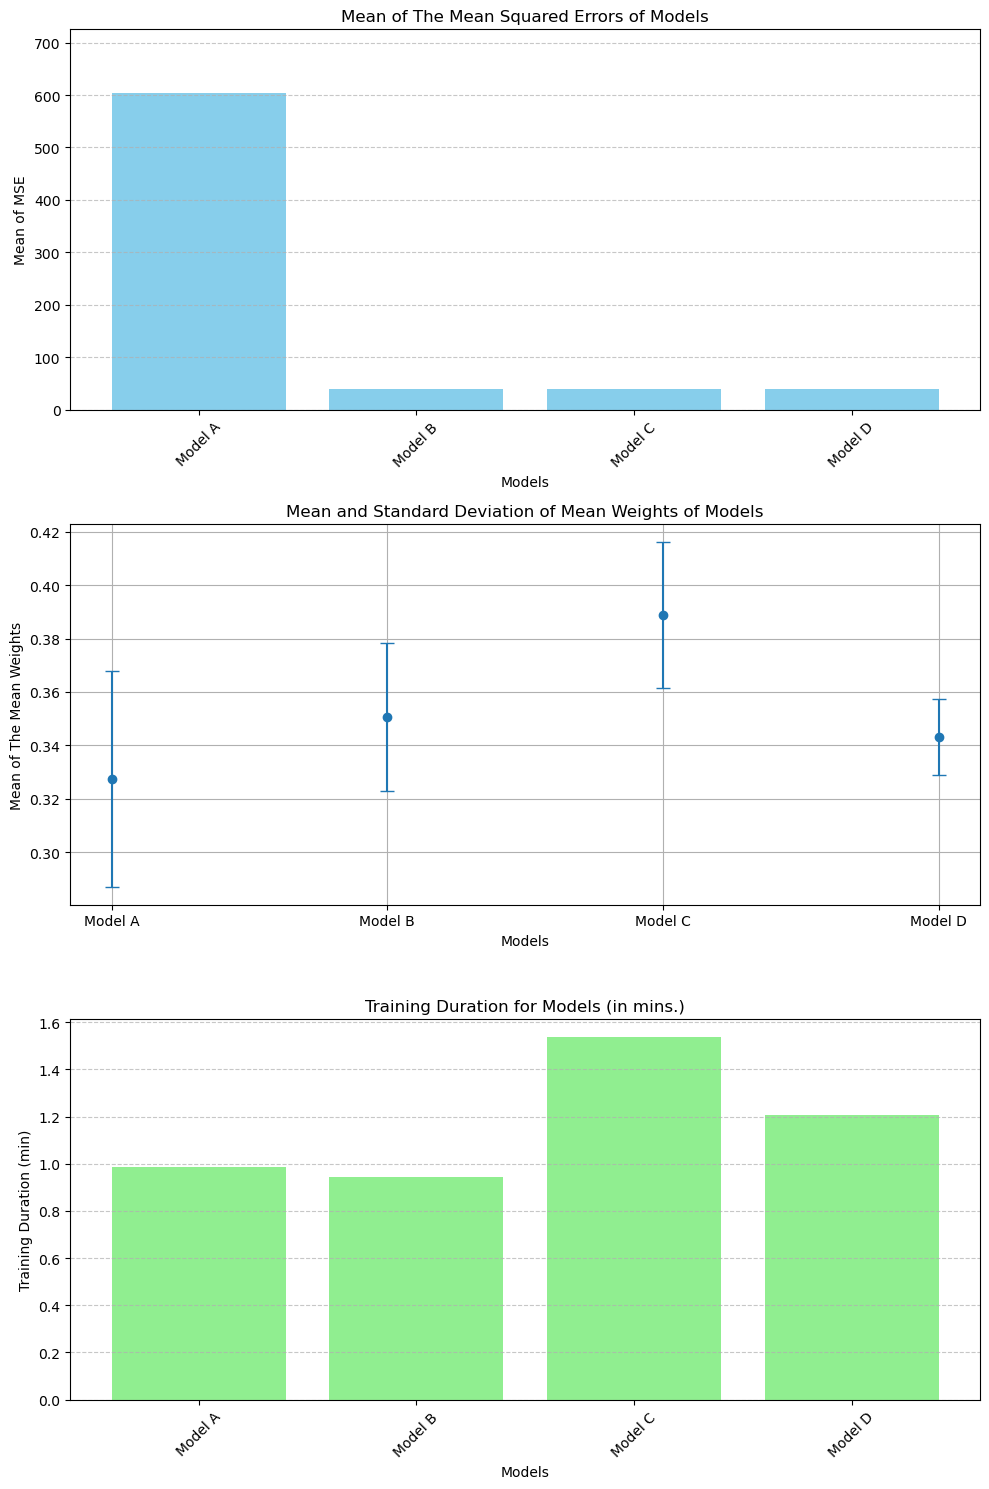

In [86]:
models_mse = ['Model A', 'Model B', 'Model C', 'Model D']
mean_mse_values = [mean_mse_Model_A, mean_mse_Model_B, mean_mse_Model_C, mean_mse_Model_D]

mean_mse_values = [np.mean(value) if isinstance(value, (list, np.ndarray)) else value for value in mean_mse_values]

# Data for Mean Weights plot
models_weights = ['Model A', 'Model B', 'Model C', 'Model D']
mean_weights = [np.mean(mean_weights_list_Model_A), np.mean(mean_weights_list_Model_B),
                np.mean(mean_weights_list_Model_C), np.mean(mean_weights_list_Model_D)]
std_weights = [np.std(mean_weights_list_Model_A), np.std(mean_weights_list_Model_B),
               np.std(mean_weights_list_Model_C), np.std(mean_weights_list_Model_D)]

# Data for Training Duration plot
models_duration = ['Model A', 'Model B', 'Model C', 'Model D']
train_durations = [Loop_Time_Model_A / 60, Loop_Time_Model_B / 60, Loop_Time_Model_C / 60, Loop_Time_Model_D / 60]

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plotting Mean Squared Errors
axs[0].bar(models_mse, mean_mse_values, color='skyblue')
axs[0].set_title('Mean of The Mean Squared Errors of Models')
axs[0].set_xlabel('Models')
axs[0].set_ylabel('Mean of MSE')
axs[0].set_ylim(0, max(mean_mse_values) * 1.2)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)
axs[0].tick_params(axis='x', rotation=45)

# Plotting Mean Weights
axs[1].errorbar(models_weights, mean_weights, yerr=std_weights, fmt='o', capsize=5)
axs[1].set_title('Mean and Standard Deviation of Mean Weights of Models')
axs[1].set_xlabel('Models')
axs[1].set_ylabel('Mean of The Mean Weights')
axs[1].grid(True)

# Plotting Training Duration
axs[2].bar(models_duration, train_durations, color='lightgreen')
axs[2].set_title('Training Duration for Models (in mins.)')
axs[2].set_xlabel('Models')
axs[2].set_ylabel('Training Duration (min)')
axs[2].grid(axis='y', linestyle='--', alpha=0.7)
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# *Conclusion*

### *Mean Squared Error*
While the mean of the mean squared errors for Models B, C, and D are similar and close to each other, Model A's MSE value was considerably higher. The importance of scaling is evident in this study. Additionally, the standard deviation of the mean squared errors of Model A was higher than the mean of the mean squared errors, indicating higher error variation compared to other models.

The reasons for this difference between scaling and not scaling can be listed as follows:

1- Gradient descent convergence.

2- Sensitivity to weight initialization.


### *Means and Standart Deviations of The Models*
While the means of the mean weights of the models were found to be similar, the variations of mean weights within the models differed. In this case, Model A had the highest variation, and it can be seen that scaling successfully decreased variation compared to Model A and Model B.

In the context of the number of epochs, 50 epochs and 100 epochs did not affect the variation for Model B and Model C, respectively. However, including two additional hidden layers in the model decreased the variation of the mean weights of Model D by approximately 50%, compared to Model C and Model D.


### *Training Duration*
Scaling did not significantly affect training durations when comparing Model A and Model B. While the training duration of Model D, with 50 epochs and 3 hidden layers, was approximately 20% higher than that of Model B with 50 epochs and 1 hidden layer, Model C had the highest training duration with 100 epochs and 1 hidden layer.

Considering all these results:

1- Scaling is crucial for higher accuracy and lower variation in mean weights.

2- Depth over the number of epochs results in lower training duration and lower variation in mean weights.